<a href="https://colab.research.google.com/github/luisgdelafuente/gnai/blob/main/gameoflife_with_controls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

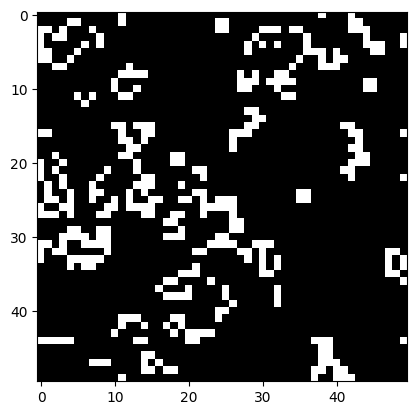

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Size of the grid
rows, cols = 50, 50

# Initialize the grid randomly
grid = np.random.choice([0, 1], size=(rows, cols), p=[0.8, 0.2])

# Function to update the grid based on the Game of Life rules
def update(frameNum, img, grid, rows, cols):
    new_grid = np.copy(grid)
    for row in range(rows):
        for col in range(cols):
            # Count live neighbors
            neighbors_sum = int((grid[row, (col-1)%cols] + grid[row, (col+1)%cols] +
                                 grid[(row-1)%rows, col] + grid[(row+1)%rows, col] +
                                 grid[(row-1)%rows, (col-1)%cols] + grid[(row-1)%rows, (col+1)%cols] +
                                 grid[(row+1)%rows, (col-1)%cols] + grid[(row+1)%rows, (col+1)%cols]))

            # Apply Game of Life rules
            if grid[row, col] == 1:
                if neighbors_sum < 2 or neighbors_sum > 3:
                    new_grid[row, col] = 0
            else:
                if neighbors_sum == 3:
                    new_grid[row, col] = 1

    img.set_array(new_grid)
    grid[:] = new_grid[:]
    return img,

# Create a figure and plot the initial grid
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='gray')

# Function to initialize the animation
def init():
    img.set_array(grid)
    return img,

# Create animation
ani = animation.FuncAnimation(fig, update, fargs=(img, grid, rows, cols),
                              frames=50, init_func=init, interval=200, blit=True)

# Display the animation
HTML(ani.to_jshtml())

